# 分群(Clustering)
1. 目標: 
    - 群內相似度很高
    - 群間相似度很低
2. 主要影響因子: 
    - 相似度的衡量與實作
    - 「群」的定義
    - 演算法
3. 應用面: 
    - 市場區隔
    - 生物分群
    - 新聞分群
    - 圖片標記

# 距離的定義
1. Euclidean distance(歐基里德距離)
    - $d(i, j) = \sqrt{|x_{i1} - x_{j1}|^2 + |x_{i2} - x_{j2}|^2 + \dots + |x_{in} - x_{jn}|^2}$
2. Manhattan (city block) distance(曼哈頓距離)
    - $d(i, j) = |x_{i1} - x_{j1}| + |x_{i2} - x_{j2}| + \dots + |x_{in} - x_{jn}|$
3. Minkowski distance
    - $d(i, j) = \sqrt[q]{|x_{i1} - x_{j1}|^q + |x_{i2} - x_{j2}|^q + \dots + |x_{in} - x_{jn}|^q}$
4. Weighted Manhattan distance(加權曼哈頓距離)
    - $d(i, j) = \sqrt[q]{w1|x_{i1} - x_{j1}|^q + w2|x_{i2} - x_{j2}|^q + \dots + w3|x_{in} - x_{jn}|^q}$


# IMPORT & DATA

In [1]:
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np
np.random.seed(1212)

import os
from collections import Counter
import pandas as pd

from load_all_datasets import load
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA



flower


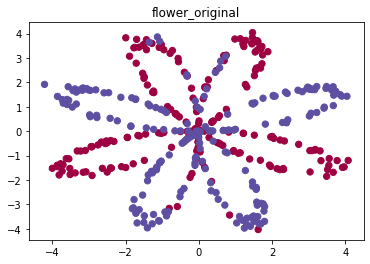

noisy_circles


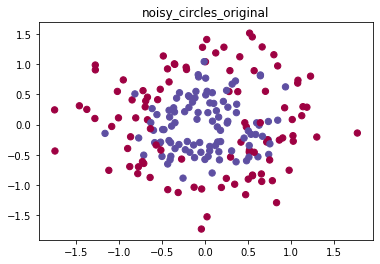

noisy_moons


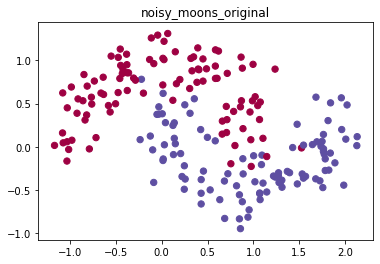

blobs


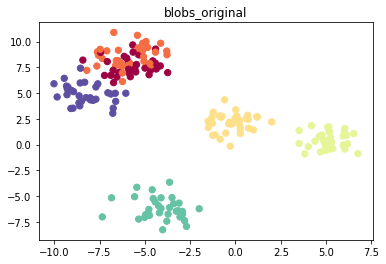

gaussian_quantiles


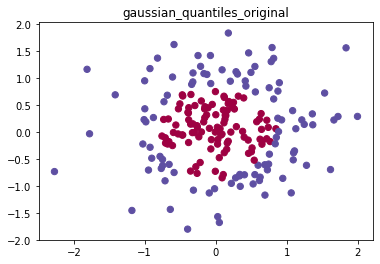

In [2]:
# demo用資料
datas = load()

for name, X, Y in datas:
    print(name)
    plt.scatter(X[:, 0], X[:, 1], c=Y , s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_original')
    plt.show()

In [3]:
# 練習用資料
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris['feature_names'])
df_iris['target'] = list(map(lambda x:iris.target_names[x], iris.target))
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 簡單資料探索
# 請找出每一個target(花的類別)的種類各有幾筆資料(hint: groupby)
#!=============your works starts===============!#
df_iris.groupby('target').count()
#!==============your works ends================!#

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


c:\users\thinktron\projects\iiimaterial\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


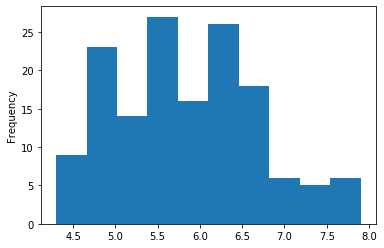

In [5]:
#請畫出['sepal length (cm)']的分布狀況
#!=============your works starts===============!#
df_iris['sepal length (cm)'].plot('hist')
#!==============your works ends================!#

plt.show()

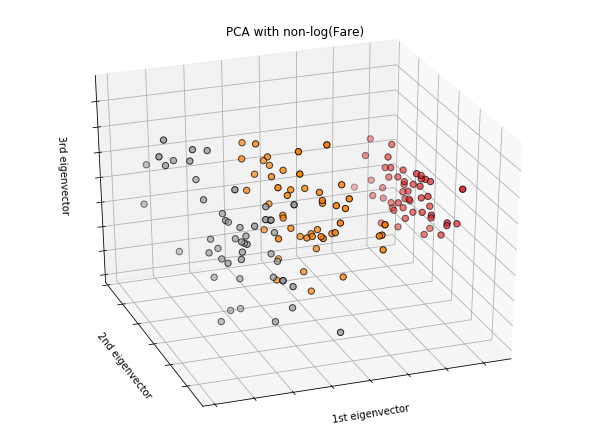

In [6]:
iris_X = df_iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
iris_Y = iris.target
X = iris_X
Y = iris_Y

#請使用PCA畫出不同花在三維空間中的分布位置(請上網尋找PCA的程式碼，並複製過來)
#!=============your works starts===============!#
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#!==============your works ends================!#

plt.show()

# ALGORITHM

## 1. K-means
### steps
1. 設定重心: 
    - 決定要分幾個群(e.g. K群)
    - 隨機產生K個重心
2. 分群: 
    - 找到所有資料點歸屬的重心: 找到分別最靠近這三個點的所有資料點，並做第一個迴圈的分群
3. 尋找重心: 
    - 重新計算所有資料點的重心(element-wise的平均)
4. ....
5. 停止: 
    - 重複上述方法，只到不會有資料點因為重新尋找重心而改變群組

### visualize
1. web: 

[game](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)

2. GIF: 

![kmeans](./imgs/kmeans.gif)

### parameters
|參數 | 意義|
|--- | ---|
|n_cluster | 要分成幾個群|
|random_state | 決定初始點的隨機seed|

### pros & cons
1. 一開始需要決定要分成幾個群


1. 優點
    - 效率: 時間複雜度O(tkn)。n是資料點的個數，k是群的個數，t是迴圈的個數，一班來說: k, t << n。 
2. 缺點
    - 需要指定分成幾群
    - 無法處理具有雜訊(noisy)的資料及離群值(outliers)
    - 無法處理不同大小及不同密度的群
    
    ![KmeansCon1.JPG](./imgs/KmeansCon1.JPG)
    
    - 無法發現凸多邊形(non-convex)以外的群
    
    ![KmeansCon2.JPG](./imgs/KmeansCon2.JPG)
    
    - 通常在local optimum停止



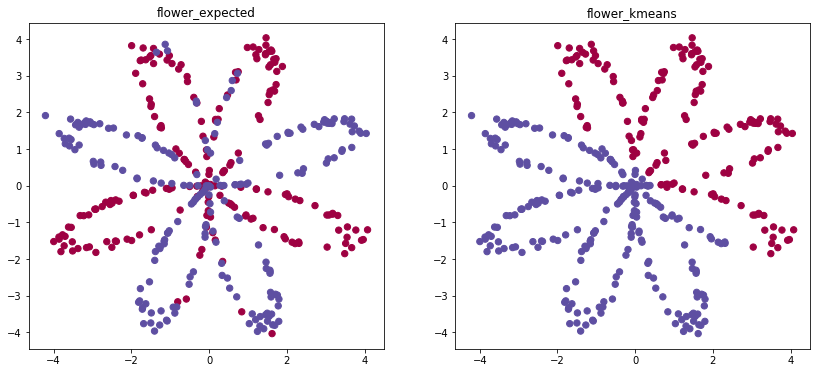

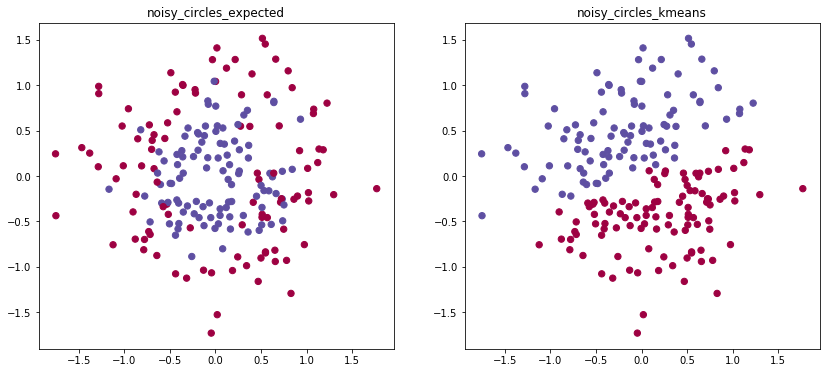

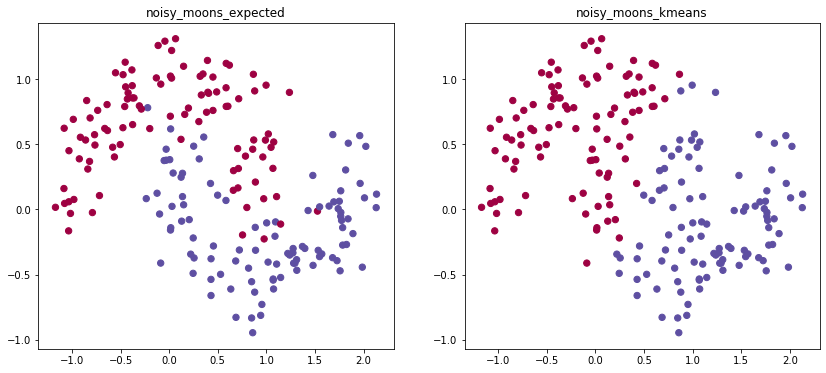

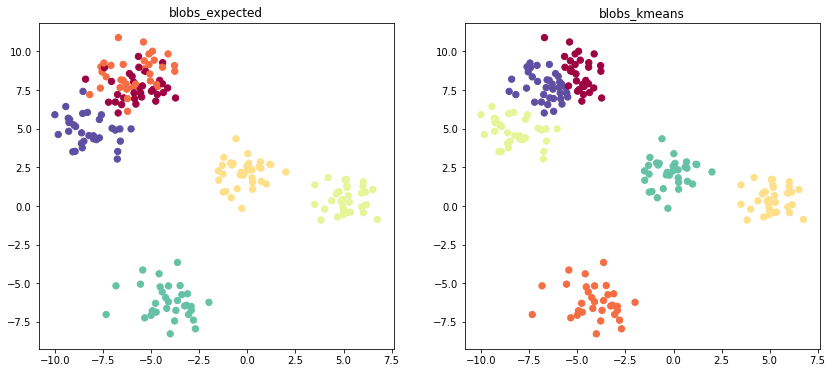

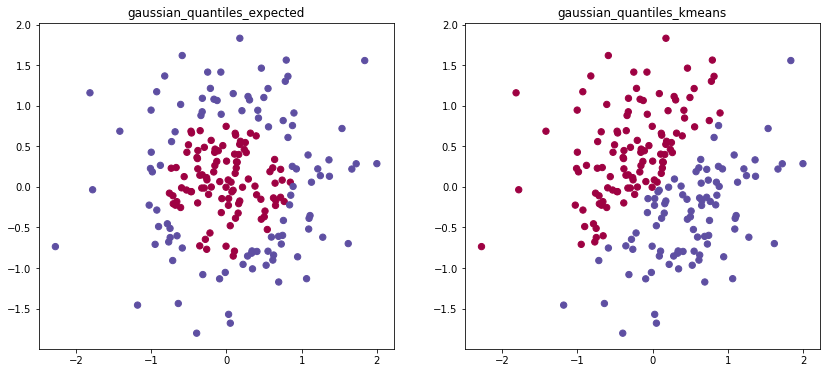

In [7]:
for name, X, Y in datas:
    plt.figure(figsize=(14,6))

    
    axes1 = plt.subplot(1, 2, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name + "_expected")
    
    axes2 = plt.subplot(1, 2, 2)
    n_clusters = len(set(Y))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=kmeans, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_kmeans')

    plt.show()

In [8]:
# 請使用kmeans將iris_X進行分群(注意:random_state=0)
#=============your works starts===============#
n_clusters = len(set(iris_Y))
kmeans_Y = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(iris_X)
#==============your works ends================#

np.random.seed(1212)
print(kmeans_Y[np.random.randint(149, size=10)])
# # [2 0 0 2 2 1 1 1 1 0]


[2 0 0 2 2 1 1 1 1 0]


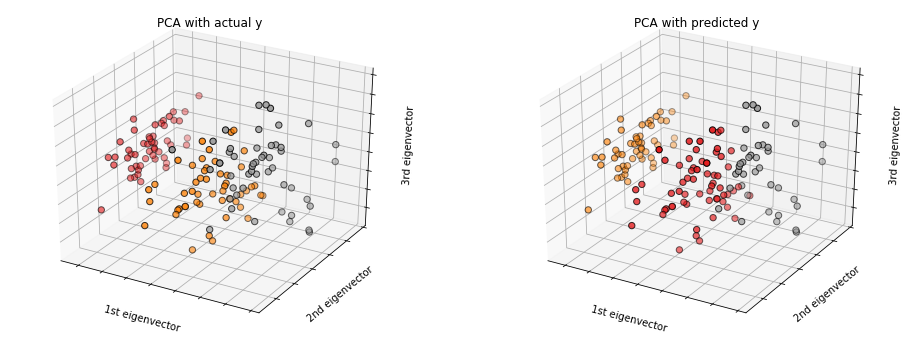

In [9]:
# actual 
def plot_iris_predict_acc(predict_Y):
    X = iris_X
    Y = iris_Y
    fig = plt.figure(1, figsize=(16, 6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("PCA with actual y")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    # predict
    X = iris_X
    Y = predict_Y
    fig = plt.figure(1, figsize=(16, 6))
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("PCA with predicted y")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()
    
np.random.seed(1212)
plot_iris_predict_acc(kmeans_Y)

In [10]:
# curve the k-means algorithm
from sklearn.metrics.pairwise import euclidean_distances
np.random.seed(2424)
n_samples = 40
n_features = 100
n_means = 3

# initialize your X and means using np.random.random()
#=============your works starts===============#
X = np.random.random([n_samples, n_features])
means = np.random.random([n_means, n_features])
#==============your works ends================#

print(X.shape)
print(means.shape)
# (40, 100)
# (3, 100)

(40, 100)
(3, 100)


In [11]:
# find the distance between each sample and mean(hint: euclidean_distances)
#=============your works starts===============#
distances = euclidean_distances(X, means)
#==============your works ends================#

print(distances.shape)
# (40, 3)

(40, 3)


In [12]:
# get the nearest mean index(0,1,2) for each sample (hint: np.argmin)
#=============your works starts===============#
nearest_mean_index = np.argmin(distances, axis=1)
#==============your works ends================#

print(nearest_mean_index.shape)
# (40,)

(40,)


In [13]:
# find the X belong to each cluster
#=============your works starts===============#
X_belong_cluster_n =[X[nearest_mean_index==i] for i in range(n_means)]
#==============your works ends================#

print(len(X_belong_cluster_n))
print(X_belong_cluster_n[0].shape)
print(X_belong_cluster_n[1].shape)
print(X_belong_cluster_n[2].shape)

# 3
# (17, 100)
# (9, 100)
# (14, 100)

3
(17, 100)
(9, 100)
(14, 100)


In [14]:
# find new mean for each cluster
# and reshape into (3, 100)
#=============your works starts===============#
new_means = [np.average(X, axis=0) for X in X_belong_cluster_n]
new_means = np.array(new_means)
#==============your works ends================#

print(new_means.shape)
# (3, 100)

(3, 100)


## 2. Hierarchical Clustering
### steps
hierarchical的分群方法，步驟簡述如下，可參考下圖(取自維基百科):

    1. 把每一個點當作一個群組
    2. 透過掃描過整個資料及尋找出最近的兩個群組，並把這兩個點榜再一起變成一個群組
    3. 尋找下一個最近的的兩個群組，再綁再一起變成一個群組
    4. ....
    5. 停止: 直到所有資料都被分成一群，或是透過設定參數到分到幾個群時自動停止

![hierarchical](./imgs/Hierarchical_clustering.svg.png)

### parameters

1. table

參數 | 意義
--- | ---
linkage | 如何衡量群與群之間的距離。(註解)
n_clusters | 分成幾個群

2. 註解:
    - ward(single): 兩個群中最近的點。
    - complete: 兩個群中最遠的點。
    - average:兩個群的重心。

### pros & cons

1. 比較耗效能: 因為有100萬筆資料，就要跑100萬次迴圈，每一次迴圈都要掃描過每一筆資料，才能跑完。
2. 很適合用來做生物分類，因為它可以完整畫出分類樹狀圖。

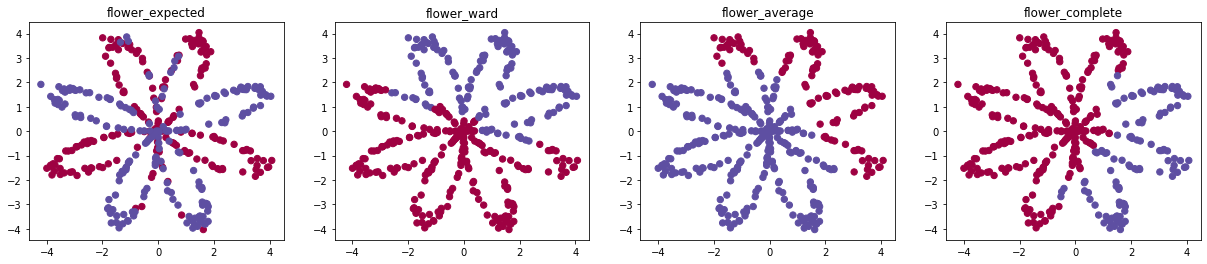

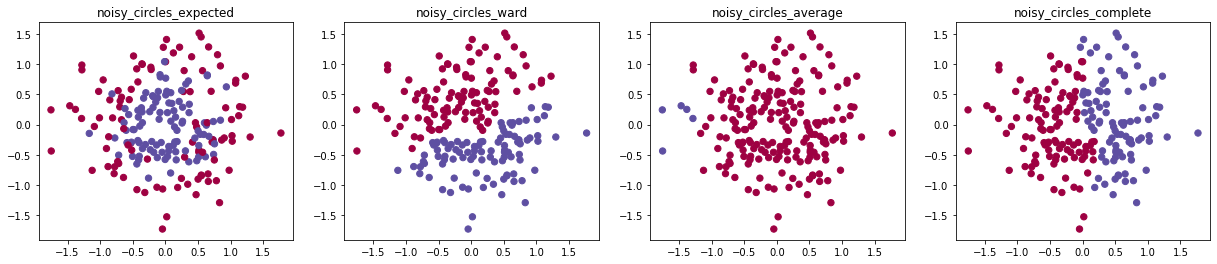

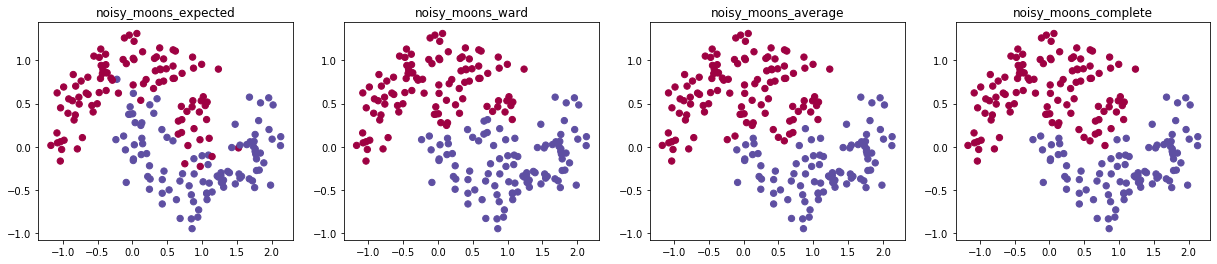

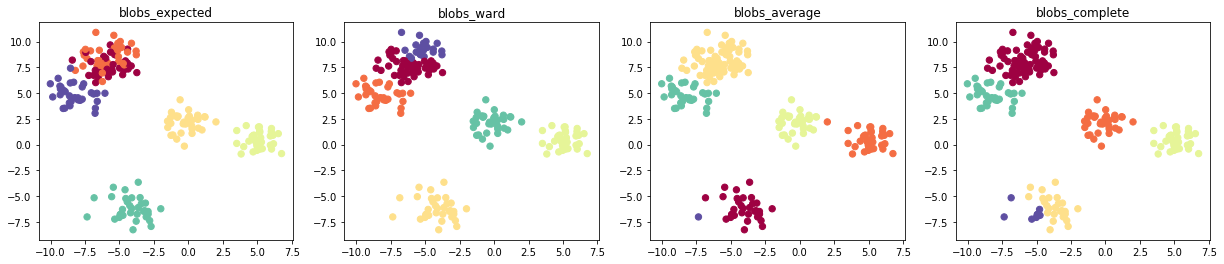

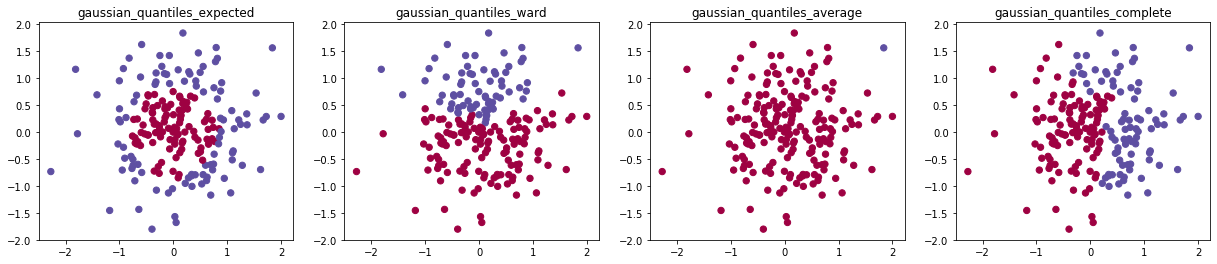

In [15]:
linkage = ['ward', 'average', 'complete']
for name, X, Y in datas:
    
    plt.figure(figsize=(21,4))

    axes1 = plt.subplot(1, 4, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_expected')

    axes2 = plt.subplot(1, 4, 2)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[0], n_clusters=n_clusters).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[0])

    axes3 = plt.subplot(1, 4, 3)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[1], n_clusters=n_clusters).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[1])

    
    axes4 = plt.subplot(1, 4, 4)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[2], n_clusters=n_clusters).fit_predict(X)
    axes4.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[2])

    
    
    plt.show()

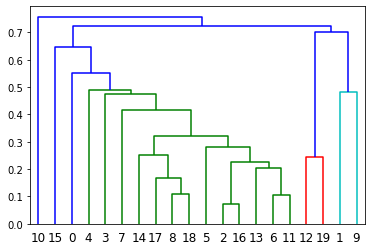

In [16]:
# Other Method (參考就好)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X[:20], 'single')
plt.figure()
dn = dendrogram(Z)
plt.show() 

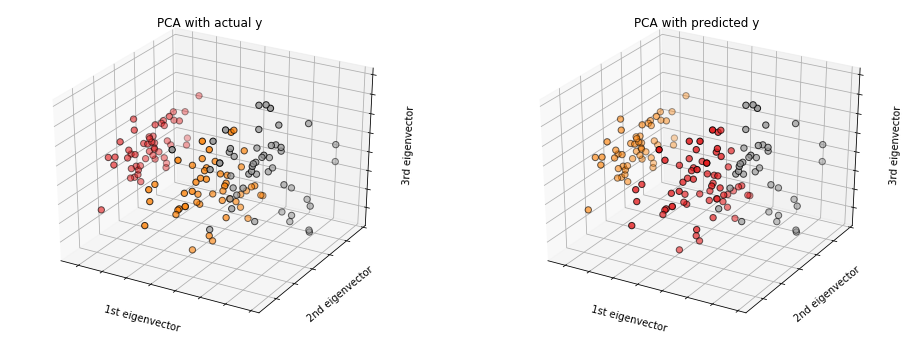

In [17]:
# 請用AgglomerativeClustering(linkage='average')將iris_X進行分群
#=============your works starts===============#
n_clusters = len(set(iris_Y))
hierarchy_Y = AgglomerativeClustering(linkage='average', n_clusters=n_clusters).fit_predict(iris_X)
#==============your works ends================#


plot_iris_predict_acc(hierarchy_Y)

## 3. Density Based Clustering (DBSCAN)
### steps
顧名思義，這種分群演算法計算的是密度，透過設定多長的半徑內，有出現幾個點，不斷延伸，延伸到無法延伸，所有出現在前面延伸範圍的點分成一個群組，請見下圖(取自[stackexchange](https://stats.stackexchange.com/questions/194734/dbscan-what-is-a-core-point))。

![DBSCAN](./imgs/dbscan.png)

### parameters
參數 | 意義
--- | ---
eps | 半徑

### pros & cons
1. 常常用來偵測Noisy Data。
2. 無法設定要分成幾個群。

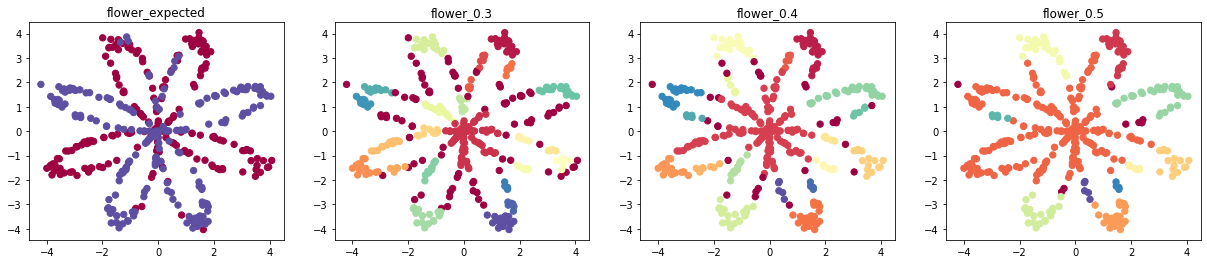

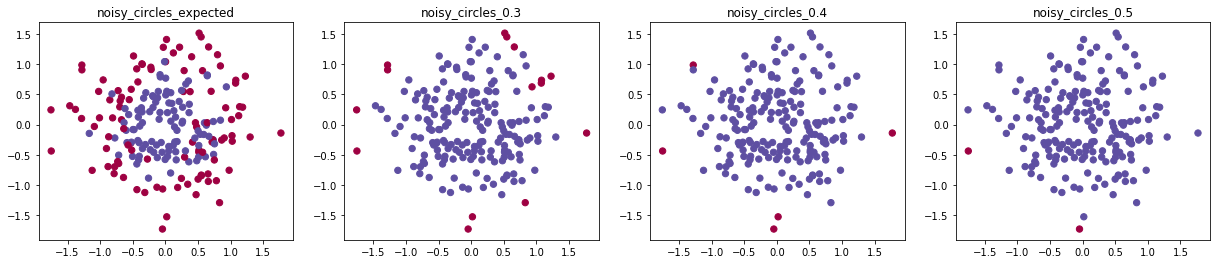

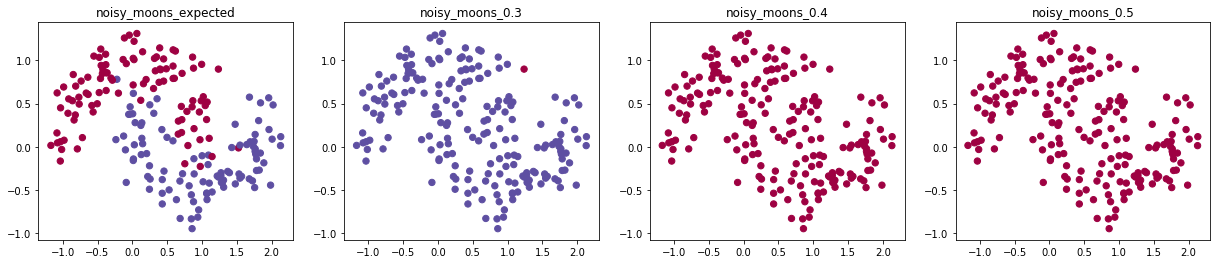

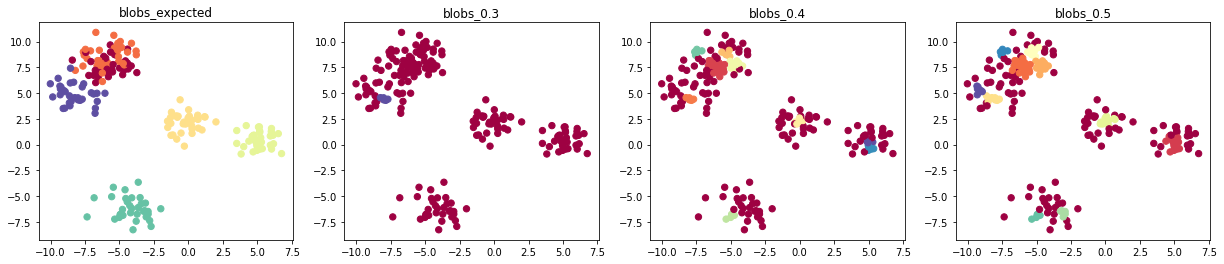

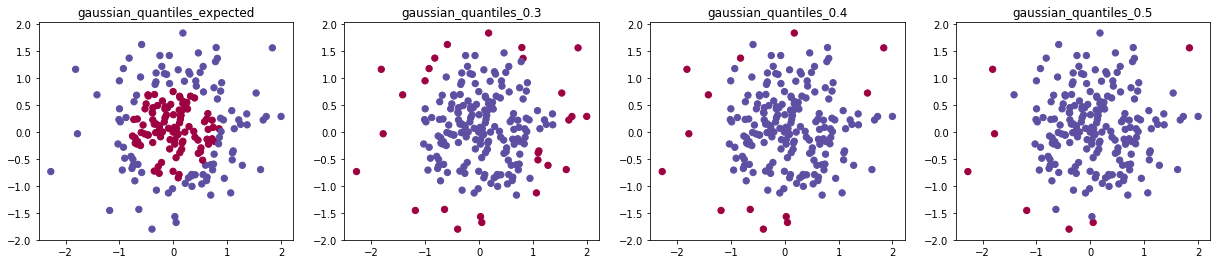

In [18]:
epss = [0.3, 0.4, 0.5]
for name, X, Y in datas:
    
    plt.figure(figsize=(21,4))

    
    axes1 = plt.subplot(1, 4, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_expected')
    
    
    axes2 = plt.subplot(1, 4, 2)
    dbscan = DBSCAN(eps=epss[0]).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_'+str(epss[0]))


    axes3 = plt.subplot(1, 4, 3)
    dbscan = DBSCAN(eps=epss[1]).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_'+str(epss[1]))

    
    axes3 = plt.subplot(1, 4, 4)
    dbscan = DBSCAN(eps=epss[2]).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_'+str(epss[2]))

        
    plt.show()

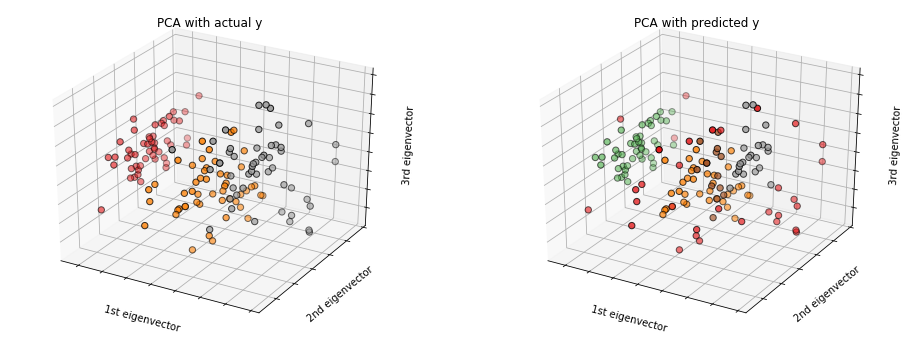

In [19]:
# 請用DBSCAN(eps=0.3)將iris_X進行分群
#=============your works starts===============#
dbscan_Y = DBSCAN(eps=epss[1]).fit_predict(iris_X)
#==============your works ends================#

plot_iris_predict_acc(dbscan_Y)